In [7]:
import pandas as pd
import numpy as np
import pickle
import json
import nltk
import util
import imp
import copy

In [2]:
# Load anthology into dataframe
df = pd.read_csv("data/anthology_conferences.csv", sep="|", keep_default_na=False,
                 converters={"semantic_scholar_keywords":lambda x: x.strip("[]").replace("'", "").split(", "),
                            "cso_syntactic":lambda x: x.strip("[]").replace("'", "").split(", "),
                            "cso_semantic":lambda x: x.strip("[]").replace("'", "").split(", "),
                            "cso_union":lambda x: x.strip("[]").replace("'", "").split(", "),
                            "cso_enhanced":lambda x: x.strip("[]").replace("'", "").split(", ")})
df[:2]

,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,pages,...,note,pdf,abstract,semantic_scholar,semantic_scholar_authorIds,semantic_scholar_keywords,cso_syntactic,cso_semantic,cso_union,cso_enhanced
0,https://www.aclweb.org/anthology/2020.acl-main.1,Association for Computational Linguistics,Online,2020,July,,Learning to Understand Child-directed and Adul...,inproceedings,gelderloos-etal-2020-learning,1--6,...,,2020.acl-main.1.pdf,Speech directed to children differs from adult...,2020.acl-main.1.json,"['7805500', '2756960', '103538973']","[1017215, 1588157]","[linguistics, acoustics, language acquisition,...","[speech signals, synthetic speech, linguistics...","[linguistics, automatic speech recognition, ac...","[speech recognition, signal processing, educat..."
1,https://www.aclweb.org/anthology/2020.acl-main.2,Association for Computational Linguistics,Online,2020,July,,Predicting Depression in Screening Interviews ...,inproceedings,rinaldi-etal-2020-predicting,7--18,...,,2020.acl-main.2.pdf,Despite the pervasiveness of clinical depressi...,2020.acl-main.2.json,"['19320780', '2457504', '37202877']",[8505],"[linguistics, pattern languages, psycholinguis...","[latent variable, latent factor, linguistics, ...","[latent factor, linguistics, dialogue, pattern...","[matrix factorizations, argumentation, speech ..."


In [31]:
# Here load results of best clustering 
texts, embeddings = util.load_embeddings("paraphrase-distilroberta-base-v2_titles.pkl")
cluster2indices, labels, _ = util.load_best_clustering()
last_year = 2020
df_clustered = df

In [32]:
# Remove papers from 2021 if not already done
indices_to_remove = []
for i, row in df.iterrows():
    if row["year"] > 2020:
        indices_to_remove.append(i)
        
print("Number of indices to remove:", len(indices_to_remove))
print("Number of indices in cluster2indices:", sum([len(cluster2indices[x]) for x in cluster2indices]))

cluster2indices_new = dict()
for cluster in cluster2indices:
    cluster2indices_new[cluster] = []
    for i in cluster2indices[cluster]:
        if i not in indices_to_remove:
            cluster2indices_new[cluster].append(i)
            
print("Number of indices in cluster2indices_new:", sum([len(cluster2indices_new[x]) for x in cluster2indices_new]))

labels_new = []
for i, label in enumerate(labels):
    if i not in indices_to_remove:
        labels_new.append(label)
        
print("Number of labels_new", len(labels_new))

texts_new = []
embeddings_new = []
for i, text in enumerate(texts):
    if i not in indices_to_remove:
        texts_new.append(text)
        embeddings_new.append(embeddings[i])
        
print("Number of texts_new", len(labels_new))
print("Number of embeddings_new", len(labels_new))

Number of indices to remove: 8
Number of indices in cluster2indices: 15713
Number of indices in cluster2indices_new: 15705
Number of labels_new 15705
Number of texts_new 15705
Number of embeddings_new 15705


In [33]:
cluster2indices = cluster2indices_new
labels = labels_new
texts = texts_new
embeddings = embeddings_new

In [34]:
# Load cluster2citations_predicted (the citations predicted for the next few years by the DNN)
with open("data/clusters/cluster2citations_predicted.json") as jf:
    cluster2citations_pred = json.load(jf)

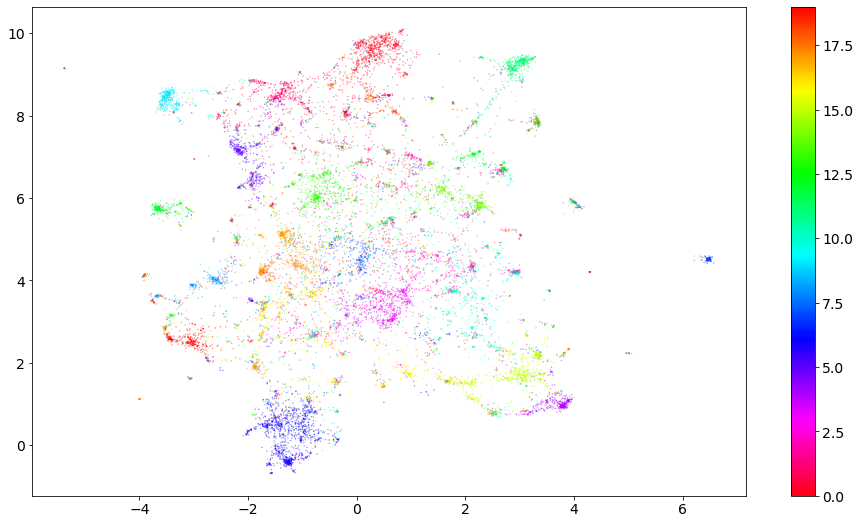

In [35]:
# Visualize embeddings and the clusters
util.visualize_embeddings(embeddings, labels, cluster=True)

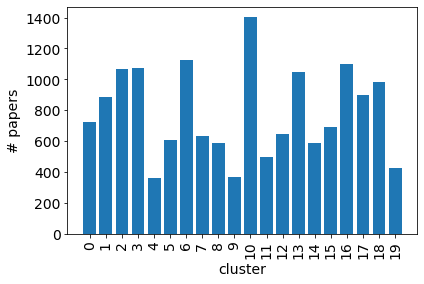

In [36]:
util.plot_cluster_hist(cluster2indices)

In [62]:
imp.reload(util)

<module 'util' from '/data/git/mse-trend-prediction/util.py'>

In [38]:
# Some mappings we need for plotting
cluster2keywords = util.get_cluster2words(cluster2indices, "sem_scholar", df_clustered, n=15)
cluster2cso_topics = util.get_cluster2words(cluster2indices, "cso", df_clustered, n=15)

0
21
50
55
81
179
205
212
214
215
216
262
343
344
347
393
478
481
482
501
567
632
660
816
860
884
932
940
956
960
1093
1109
1153
1171
1197
1232
1454
1618
1631
1681
1693
1703
1709
1724
1740
1741
1750
1811
1990
1992
2007
2193
2224
2290
2317
2318
2389
2416
2417
2446
2475
2533
2569
2588
2618
2620
2623
2634
2635
2722
2766
2786
2797
2798
2812
2815
2826
2842
2856
2876
2896
2917
2959
3031
3063
3102
3104
3106
3111
3133
3135
3139
3143
3172
3184
3185
3209
3220
3223
3227
3235
3244
3273
3286
3315
3321
3334
3383
3385
3415
3424
3425
3426
3441
3445
3498
3509
3536
3588
3622
3623
3630
3631
3638
3649
3650
3652
3656
3661
3688
3730
3754
3768
3770
3772
3794
3822
3866
3870
3919
3936
3941
3968
3972
3986
4019
4032
4040
4047
4053
4057
4065
4066
4069
4070
4091
4096
4098
4114
4115
4131
4194
4207
4233
4277
4293
4305
4334
4354
4370
4393
4400
4423
4434
4441
4450
4461
4468
4481
4495
4523
4536
4597
4599
4600
4601
4616
4620
4629
4652
4811
4814
4816
4819
4834
4854
4856
4863
4925
5048
5068
5070
5101
5128
5129
5158
5243
5

5526
5549
5563
5564
5588
5590
5598
5605
5609
5631
5639
5644
5713
5716
5739
5759
5769
5770
5780
5782
5826
5827
5828
5832
5843
5845
5846
5847
5849
5851
5853
5934
5941
5949
5955
5968
5971
5985
5995
6016
6025
6033
6056
6072
6074
6085
6088
6099
6159
6174
6176
6197
6207
6217
6235
6241
6255
6263
6286
6308
6338
6346
6377
6381
6382
6390
6399
6404
6453
6456
6458
6494
6495
6502
6509
6526
6528
6557
6558
6562
6565
6566
6569
6592
6603
6653
6660
6673
6675
6680
6682
6702
6706
6707
6712
6714
6731
6741
6776
6821
6864
6876
6891
6909
6926
6927
6934
6946
6957
6963
7001
7006
7045
7056
7063
7067
7068
7092
7101
7106
7107
7119
7167
7169
7185
7187
7202
7217
7227
7248
7257
7304
7315
7333
7336
7343
7344
7364
7396
7415
7436
7458
7460
7469
7478
7511
7537
7546
7584
7637
7715
7717
7721
7722
7735
7742
7744
7758
7766
7775
7780
7790
7795
7814
7820
7821
7828
7850
7851
7852
7875
7879
7927
7941
7964
7966
7991
8030
8033
8036
8058
8059
8063
8066
8068
8069
8070
8071
8073
8077
8111
8129
8130
8136
8147
8165
8166
8171
8190
8194


6964
6968
6972
6978
6989
7000
7002
7007
7014
7017
7039
7044
7046
7054
7098
7099
7100
7134
7159
7162
7186
7206
7221
7244
7250
7287
7307
7331
7358
7362
7372
7390
7412
7417
7431
7466
7472
7477
7491
7503
7505
7538
7539
7541
7542
7549
7568
7571
7581
7592
7617
7634
7676
7690
7727
7754
7762
7769
7799
7822
7838
7849
7855
7870
7880
7885
7940
7949
7960
7968
7985
7989
8005
8008
8021
8081
8082
8087
8088
8089
8112
8134
8137
8139
8140
8156
8198
8250
8273
8275
8276
8287
8289
8324
8334
8353
8390
8409
8446
8464
8478
8530
8541
8548
8579
8590
8605
8614
8615
8616
8656
8675
8702
8722
8741
8752
8788
8804
8838
8857
8880
8886
8915
8950
8952
8955
8956
8967
8983
8991
9033
9052
9060
9064
9074
9081
9088
9100
9116
9133
9170
9239
9249
9283
9284
9285
9315
9331
9349
9351
9352
9360
9362
9371
9373
9401
9417
9440
9482
9495
9514
9527
9532
9535
9537
9567
9571
9573
9581
9584
9589
9600
9603
9604
9609
9613
9624
9627
9636
9637
9649
9652
9653
9661
9671
9702
9708
9714
9716
9725
9739
9742
9745
9755
9777
9781
9783
9784
9792
9795


13443
13450
13463
13490
13501
13510
13512
13525
13534
13559
13603
13604
13625
13639
13643
13648
13650
13653
13662
13670
13685
13689
13730
13755
13758
13762
13778
13798
13804
13806
13807
13809
13810
13811
13816
13821
13842
13857
13885
13921
13966
14095
14113
14158
14170
14176
14214
14239
14270
14291
14306
14307
14308
14309
14316
14319
14380
14384
14387
14388
14395
14421
14427
14440
14457
14468
14469
14496
14498
14506
14537
14551
14562
14565
14566
14574
14581
14584
14598
14611
14614
14617
14620
14622
14626
14631
14634
14635
14640
14645
14649
14652
14659
14692
14698
14705
14707
14755
14773
14774
14775
14797
14818
14830
14831
14871
14889
14893
14926
14927
14937
14943
14946
14956
14964
14966
14981
14985
14988
14999
15025
15055
15077
15106
15132
15154
15163
15164
15171
15179
15197
15211
15245
15252
15255
15256
15261
15262
15264
15269
15271
15283
15291
15299
15300
15314
15319
15320
15328
15330
15332
15339
15352
15360
15372
15386
15397
15409
15413
15417
15427
15450
15453
15485
15487
15490
1549

8054
8096
8097
8158
8183
8184
8189
8200
8201
8205
8208
8268
8308
8314
8329
8337
8338
8344
8395
8405
8427
8429
8431
8432
8454
8461
8465
8471
8475
8503
8510
8586
8588
8597
8600
8601
8621
8638
8647
8655
8663
8664
8677
8686
8699
8711
8740
8765
8766
8767
8853
8871
8872
8873
8885
8914
8968
8976
9005
9015
9038
9077
9079
9085
9092
9118
9127
9153
9155
9157
9180
9181
9204
9230
9231
9232
9279
9286
9294
9307
9310
9343
9344
9348
9355
9357
9374
9377
9407
9408
9427
9432
9434
9447
9461
9468
9491
9518
9521
9522
9523
9572
9598
9607
9664
9687
9695
9711
9712
9729
9731
9741
9761
9762
9771
9772
9798
9859
9871
9892
9896
9946
9957
9965
9970
9982
9992
10009
10010
10013
10016
10025
10037
10041
10046
10052
10066
10083
10089
10090
10098
10105
10110
10129
10151
10154
10156
10159
10184
10187
10195
10197
10199
10212
10224
10232
10239
10241
10253
10280
10303
10320
10331
10372
10420
10433
10458
10459
10488
10491
10524
10528
10541
10553
10555
10566
10585
10588
10622
10627
10628
10632
10660
10684
10724
10742
10759
10784

13647
13678
13679
13705
13843
13858
14009
14010
14011
14015
14019
14024
14110
14155
14168
14189
14439
14618
14675
14680
14681
14736
14806
14870
14872
14930
14938
14947
14967
14984
15072
15102
15170
15210
15313
15322
15323
15347
15524
15533
15601
15630
15707
45
108
176
259
309
406
414
419
420
492
534
695
709
736
765
795
819
845
888
946
1005
1012
1087
1090
1105
1155
1169
1176
1205
1230
1244
1251
1267
1292
1350
1376
1382
1384
1386
1492
1496
1564
1617
1635
1742
1763
1767
1788
1877
1884
1900
1904
1980
1985
2046
2061
2064
2068
2096
2139
2177
2187
2189
2215
2237
2242
2254
2315
2337
2352
2354
2373
2375
2381
2390
2414
2467
2469
2480
2498
2504
2509
2525
2545
2552
2558
2583
2615
2639
2658
2667
2681
2684
2693
2704
2717
2728
2745
2748
2772
2789
2790
2814
2817
2819
2829
2832
2834
2835
2855
2857
2859
2860
2865
2894
2900
2921
2940
2942
2969
2985
3000
3006
3020
3056
3057
3058
3064
3065
3066
3079
3086
3091
3137
3183
3186
3216
3239
3240
3258
3259
3281
3282
3309
3320
3332
3337
3339
3345
3352
3362
3402
340

8841
8842
8878
8905
8908
8951
8993
9027
9043
9068
9103
9120
9140
9272
9326
9327
9345
9381
9384
9386
9387
9388
9390
9397
9404
9409
9410
9412
9413
9423
9426
9460
9462
9465
9475
9476
9506
9533
9539
9542
9550
9564
9583
9592
9606
9621
9643
9644
9645
9691
9704
9705
9796
9814
9816
9818
9820
9825
9843
9906
9915
9925
9927
9941
9968
9996
10045
10063
10064
10065
10073
10074
10077
10087
10099
10100
10121
10131
10133
10144
10194
10202
10208
10221
10226
10233
10234
10237
10240
10257
10258
10259
10260
10282
10288
10296
10323
10338
10359
10362
10363
10364
10365
10376
10415
10438
10455
10464
10465
10477
10490
10498
10499
10516
10520
10579
10600
10619
10655
10678
10680
10712
10740
10743
10789
10819
10843
10873
11039
11043
11070
11078
11094
11109
11180
11190
11195
11198
11209
11223
11239
11240
11250
11286
11292
11316
11398
11400
11447
11458
11460
11461
11471
11486
11506
11507
11508
11509
11510
11540
11570
11573
11579
11583
11584
11585
11586
11588
11589
11590
11662
11667
11674
11677
11678
11738
11753
1176

12204
12206
12208
12209
12223
12224
12225
12226
12247
12249
12255
12256
12262
12285
12286
12320
12330
12331
12365
12376
12392
12437
12438
12439
12440
12533
12569
12570
12646
12735
12739
12748
12799
12861
12879
12920
12944
12960
12993
13017
13084
13098
13124
13134
13148
13227
13284
13599
13734
13897
14025
14221
14404
14466
14509
14563
14663
14683
14709
14710
14712
14716
14734
14738
14747
14756
14789
14803
14819
14827
14833
14864
14869
14914
14970
14978
14979
15244
15265
15381
15384
15385
15434
15470
15488
15499
15507
15537
15572
15647
15658
15673
15686
119
120
123
124
171
172
173
174
370
444
448
449
450
451
452
453
454
456
457
459
460
510
512
550
551
552
553
554
555
875
876
877
878
879
981
982
983
984
986
987
989
991
1107
1276
1277
1278
1279
1280
1281
1405
1407
1436
1450
1451
1452
1498
1499
1500
1501
1791
1792
1793
1794
1801
1817
1934
2060
2076
2105
2173
2272
2273
2377
2378
2379
2380
2460
2539
2540
2541
2561
2576
2577
2720
2775
2776
2777
2880
2898
2945
2946
2973
2983
2984
3071
3072
3224

In [39]:
# Some mappings we need for plotting
cluster2year2papers = util.get_cluster2year2papers(cluster2indices, df_clustered, last_year)
cluster2year2norm_papers = util.get_cluster2year2papers(cluster2indices, df_clustered, last_year, normalization=True)

In [40]:
# Some mappings we need for plotting
cluster2year2citations = util.get_cluster2year2citations(cluster2indices, df_clustered, last_year)
cluster2year2norm_citations = util.get_cluster2year2citations(cluster2indices, df_clustered, last_year, normalization=True)

In [41]:
# Add predicted citations to cluster2year2citations
cluster2year2citations_complete = copy.deepcopy(cluster2year2citations)

for index, cluster in cluster2year2citations_complete.items():
    citations_1990_ = sum(cluster.values())
    #print(citations_1990_)
    
    citation_2021_ = 0
    for year in cluster2citations_pred[index]:
        cluster2year2citations_complete[index][int(year)] = round(cluster2citations_pred[index][year])#  - citation_2021_)
        citation_2021_ += cluster2year2citations_complete[index][int(year)]
        
    #print(cluster2year2citations_complete[index])

In [42]:
# Normalized citations 
cluster2year2norm_citations_complete = copy.deepcopy(cluster2year2norm_citations)

all_citations_in_years = [0 for x in range(2021,2026)]

for year in range(2021, 2026):
    for c in cluster2year2citations_complete:
        all_citations_in_years[year-2021] += cluster2year2citations_complete[c][year]

print(all_citations_in_years)
        
for index, cluster in cluster2year2norm_citations_complete.items():
    for year in cluster2citations_pred[index]:
        cluster2year2norm_citations_complete[index][int(year)] = round(cluster2year2citations_complete[index][int(year)])/all_citations_in_years[int(year)-2021]#  - citation_2021_)

cluster2year2norm_citations_complete

[621399, 703708, 797027, 889079, 969344]


{'8': {1990: 0.08823529411764706,
  1991: 0.0658682634730539,
  1992: 0.05,
  1993: 0.04597701149425287,
  1994: 0.05538270068450529,
  1995: 0.05971223021582734,
  1996: 0.06057546693589096,
  1997: 0.05931558935361217,
  1998: 0.05947611710323575,
  1999: 0.06978119455943228,
  2000: 0.06277141729174891,
  2001: 0.06599089780719901,
  2002: 0.07106997176027612,
  2003: 0.06702006815600152,
  2004: 0.06591583726209184,
  2005: 0.06066676205465732,
  2006: 0.06212093365190222,
  2007: 0.05918524212144504,
  2008: 0.05382830626450116,
  2009: 0.051673917155286554,
  2010: 0.05179132620993086,
  2011: 0.050546729936042915,
  2012: 0.048087961427587436,
  2013: 0.049127358490566035,
  2014: 0.04662333370056186,
  2015: 0.03991996951219512,
  2016: 0.036143624182333654,
  2017: 0.029193198707372612,
  2018: 0.02382286699163609,
  2019: 0.01878568213583493,
  2020: 0.018238615883695783,
  2021: 0.04131644885170398,
  2022: 0.03955475850779016,
  2023: 0.037853171849887145,
  2024: 0.0363780

In [47]:
# Some example search results
to_search = [["entity"], ["translation"], ["speech"], ["information retrieval"], ["question"], ["sentiment"],
            ["word sense"], ["pos", "part of speech", "part-of-speech"], ["embedding"], ["representation"]]

for s in to_search:
    print("To search:", s)
    sem_scholar, cso = util.search_topic(cluster2indices, df_clustered, s, results=3)
    print("Semantic scholar ranking:")
    print(sem_scholar)
    print("CSO ranking:")
    print(cso)
    print("\n")

To search: ['entity']
Semantic scholar ranking:
[('12', 0.8121118012422359), ('14', 0.2679180887372014), ('11', 0.10999999999999999)]
CSO ranking:
[('7', 0.003169572107765452), ('13', 0.0028653295128939827), ('19', 0.0023584905660377358)]


To search: ['translation']
Semantic scholar ranking:
[('6', 0.9501335707925199), ('16', 0.17288444040036396), ('17', 0.1404682274247491)]
CSO ranking:
[('6', 1.902048085485307), ('16', 0.545950864422202), ('17', 0.42251950947603123)]


To search: ['speech']
Semantic scholar ranking:
[('8', 0.4210526315789474), ('19', 0.1650943396226415), ('3', 0.11545623836126628)]
CSO ranking:
[('0', 1.3897364771151177), ('8', 0.9864176570458404), ('6', 0.6518254674977739)]


To search: ['information retrieval']
Semantic scholar ranking:
[('11', 0.09200000000000001), ('14', 0.0750853242320819), ('19', 0.05660377358490566)]
CSO ranking:
[('11', 0.824), ('12', 0.6211180124223603), ('14', 0.6143344709897611)]


To search: ['question']
Semantic scholar ranking:
[('11',

In [55]:
# do all plotting in function for one cluster
def present(cluster_index, accumulated=False):
    if accumulated:
        y_lim_top_1 = 0
        for cluster in cluster2year2papers:
            m = sum([cluster2year2papers[cluster][year] for year in cluster2year2papers[cluster]])
            if m > y_lim_top_1:
                y_lim_top_1 = m
    else:
        y_lim_top_1 = max(cluster2year2papers[x][year] for x in cluster2year2papers for year in cluster2year2papers[x])
    util.plot_year2value(cluster2year2papers, cluster_index, y_label="# papers", y_lim_top=y_lim_top_1, accumulated=accumulated)
    
    if accumulated:
        y_lim_top_2 = 0
        for cluster in cluster2year2norm_papers:
            m = sum([cluster2year2norm_papers[cluster][year] for year in cluster2year2norm_papers[cluster]])
            if m > y_lim_top_2:
                y_lim_top_2 = m
    else:
        y_lim_top_2 = max(cluster2year2norm_papers[x][year] for x in cluster2year2norm_papers for year in cluster2year2norm_papers[x])
    util.plot_year2value(cluster2year2norm_papers, cluster_index, y_label="# normalized papers", y_lim_top=y_lim_top_2, accumulated=accumulated)
    util.plot_year2value_2y(cluster2year2papers, cluster2year2norm_papers, cluster_index, 
                         y_label_1="# papers", y_label_2="% papers",
                         y_lim_top_1=y_lim_top_1, y_lim_top_2=y_lim_top_2, accumulated=accumulated)
    
    y_lim_top_1 = None
    y_lim_top_2 = None
    
    if accumulated:
        y_lim_top_1 = 0
        for cluster in cluster2year2citations:
            m = sum([cluster2year2citations[cluster][year] for year in cluster2year2citations[cluster]])
            if m > y_lim_top_1:
                y_lim_top_1 = m
    else:
        y_lim_top_1 = max(cluster2year2citations[x][year] for x in cluster2year2citations for year in cluster2year2citations[x])
    util.plot_year2value(cluster2year2citations, cluster_index, y_label="# citations", y_lim_top=y_lim_top_1, accumulated=accumulated)
    
    if accumulated:
        y_lim_top_2 = 0
        for cluster in cluster2year2norm_citations:
            m = sum([cluster2year2norm_citations[cluster][year] for year in cluster2year2norm_citations[cluster]])
            if m > y_lim_top_2:
                y_lim_top_2 = m
    else:
        y_lim_top_2 = max(cluster2year2norm_citations[x][year] for x in cluster2year2norm_citations for year in cluster2year2norm_citations[x])
    util.plot_year2value(cluster2year2norm_citations, cluster_index, y_label="# normalized citations", y_lim_top=y_lim_top_2, accumulated=accumulated)
    util.plot_year2value_2y(cluster2year2citations, cluster2year2norm_citations, cluster_index, 
                         y_label_1="# citations", y_label_2="% citations",
                         y_lim_top_1=y_lim_top_1, y_lim_top_2=y_lim_top_2, accumulated=accumulated)
    
    util.plot_year2value(cluster2year2norm_citations_complete, cluster_index, 
                         y_label="% citations", y_lim_top=None, accumulated=accumulated)
    
    
    sem_scholar_keywords = util.keywords_from_ids(cluster2keywords, cluster_index)
    cso_topics = util.topics(cluster2cso_topics, cluster_index)
    print("Semantic scholar keywords:\n", sem_scholar_keywords)
    print("CSO topics:\n", cso_topics)
    
    # print for latex table
    #if True:
    #    print()
    #    print("\multirow{5}{3em}{" + cluster_index + "} & " + sem_scholar_keywords[0] + " & " + cso_topics[0] + " &  \\\\")
    #    print("& " + sem_scholar_keywords[1] + " & " + cso_topics[1] + " &  \\\\")
    #    print("& " + sem_scholar_keywords[2] + " & " + cso_topics[2] + " &  \\\\")
    #    print("& " + sem_scholar_keywords[3] + " & " + cso_topics[3] + " &  \\\\")
    #    print("& " + sem_scholar_keywords[4] + " & " + cso_topics[4] + " &  \\\\")
    #    print("\hline")

In [50]:
cluster2_2021_2025_2norm_citations = dict()
for cluster in cluster2year2norm_citations_complete:
    cluster2_2021_2025_2norm_citations[cluster] = dict()

    for year in cluster2year2norm_citations_complete[cluster]:
        if year >= last_year + 1:
            cluster2_2021_2025_2norm_citations[cluster][year] = cluster2year2norm_citations_complete[cluster][year] * 100

# Plot development for the predicted years
def plot_predictd_citations(cluster):
    util.plot_year2value(cluster2_2021_2025_2norm_citations, '11', 
                             y_label="% citations", y_lim_top=None, accumulated=False)

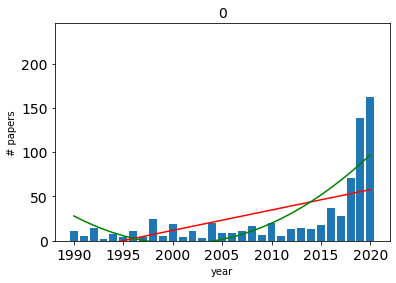

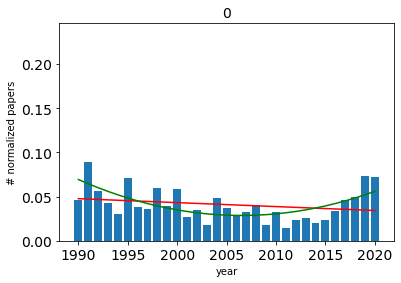

<Figure size 1152x648 with 0 Axes>

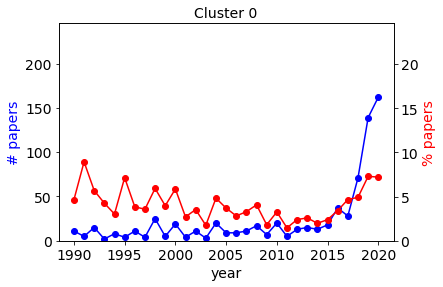

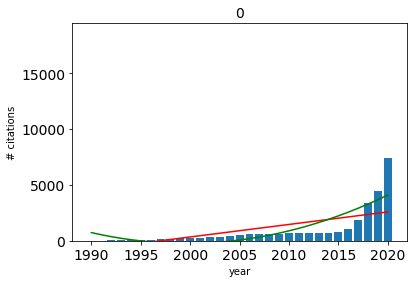

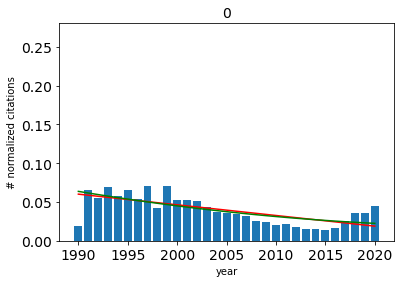

<Figure size 1152x648 with 0 Axes>

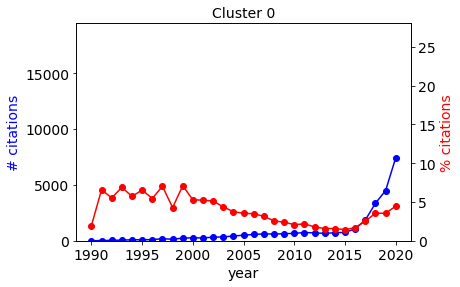

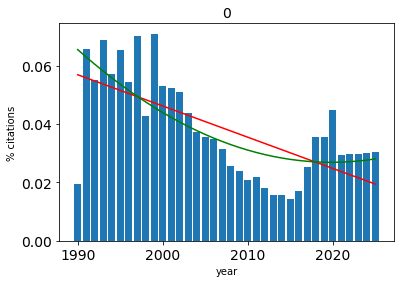

Semantic scholar keywords:
 ['Dialog system', 'Experiment', 'Baseline (configuration management)', 'Text corpus', 'Interaction', 'Algorithm', 'dialog', 'Reinforcement learning', 'Artificial neural network', 'Parsing', 'Simulation', 'Natural language processing', 'Benchmark (computing)', 'End-to-end principle']
CSO topics:
 ['speech processing', 'argumentation', 'linguistics', 'speech communication', 'natural language processing', 'education', 'dialogue systems', 'human computer interaction', 'machine learning', 'computational linguistics', 'artificial intelligence', 'semantics', 'machine translations', 'formal languages', 'speech recognition']


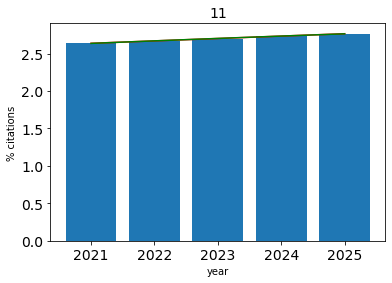

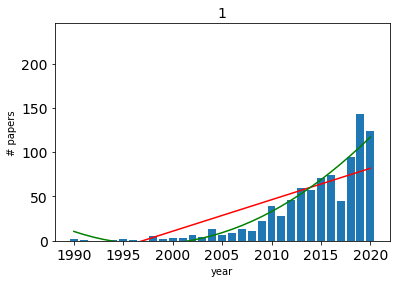

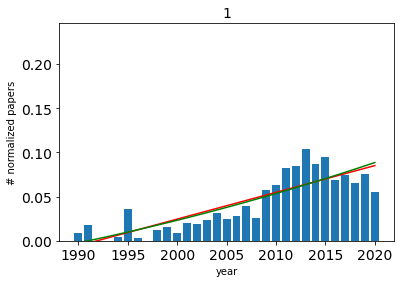

<Figure size 1152x648 with 0 Axes>

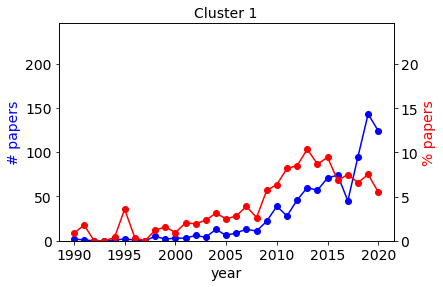

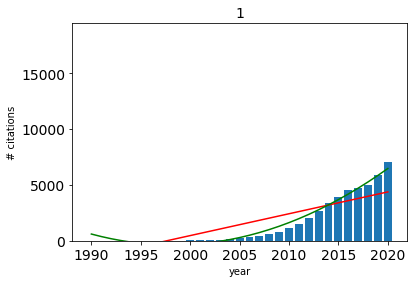

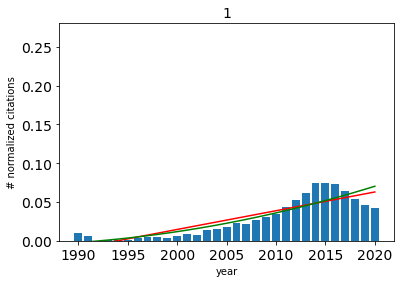

<Figure size 1152x648 with 0 Axes>

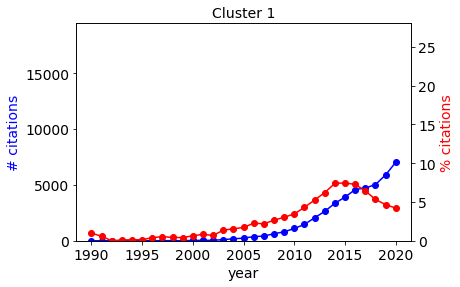

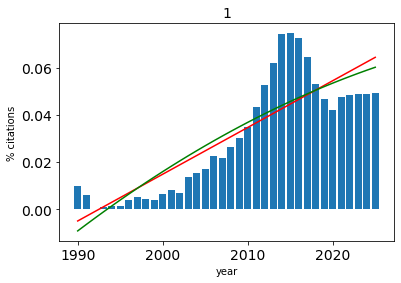

Semantic scholar keywords:
 ['Experiment', 'Baseline (configuration management)', 'Social media', 'Text corpus', 'Algorithm', 'Natural language processing', 'Sensor', 'Machine learning', 'Artificial neural network', 'Topic model', 'Wikipedia', 'Supervised learning', 'Unsupervised learning', 'Crowdsourcing']
CSO topics:
 ['world wide web', 'natural language processing', 'machine learning', 'social networks', 'education', 'computational linguistics', 'data mining', 'linguistics', 'artificial intelligence', 'correlation analysis', 'recommender systems', 'text mining', 'information retrieval systems', 'social media', 'twitter']


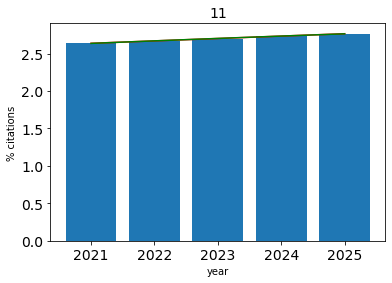

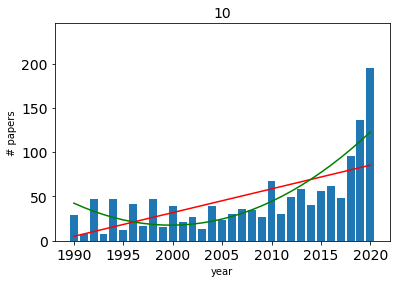

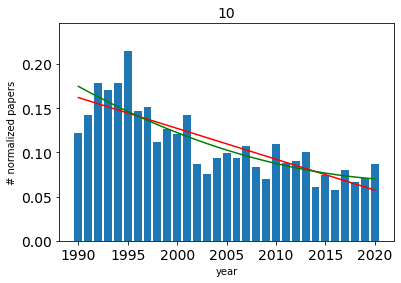

<Figure size 1152x648 with 0 Axes>

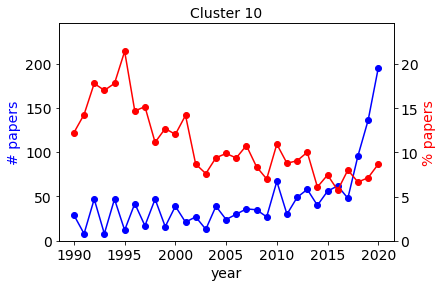

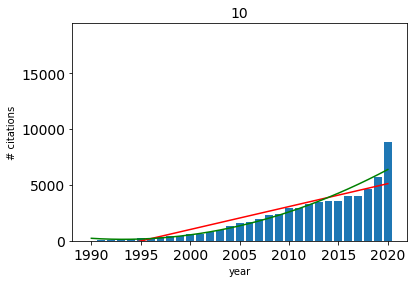

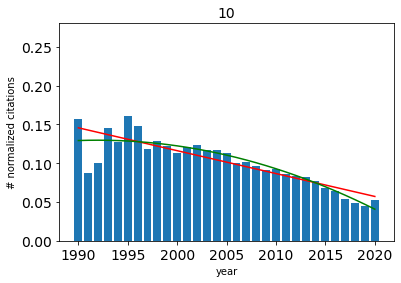

<Figure size 1152x648 with 0 Axes>

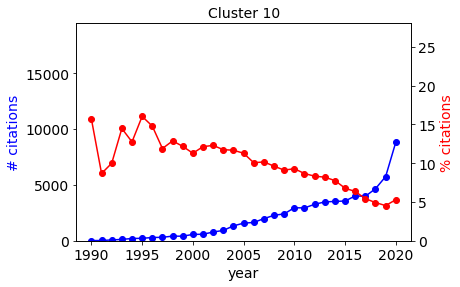

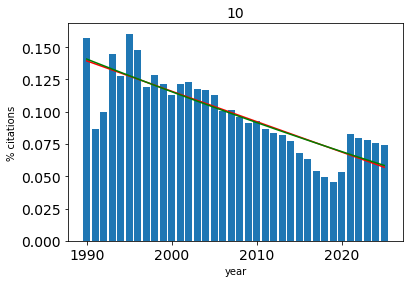

Semantic scholar keywords:
 ['Natural language processing', 'Experiment', 'Algorithm', 'Parsing', 'Text corpus', 'Baseline (configuration management)', 'Computation', 'Language model', 'Machine translation', 'Natural language', 'Benchmark (computing)', 'Artificial neural network', 'Machine learning', 'Part-of-speech tagging']
CSO topics:
 ['natural language processing', 'computational linguistics', 'artificial intelligence', 'linguistics', 'mathematics', 'formal languages', 'education', 'semantics', 'translation (languages)', 'information retrieval', 'syntactics', 'natural languages', 'information theory', 'machine learning', 'inference engines']


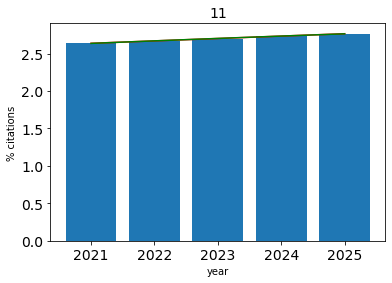

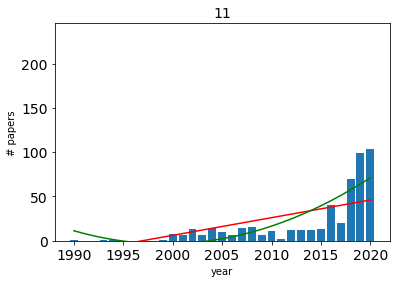

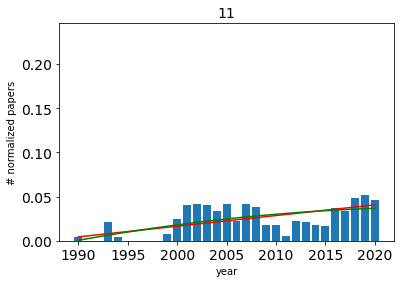

<Figure size 1152x648 with 0 Axes>

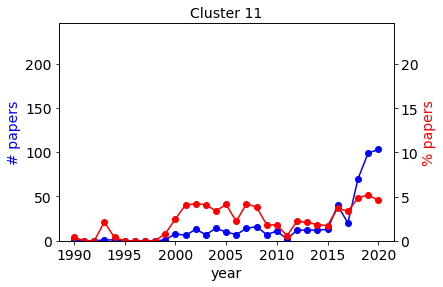

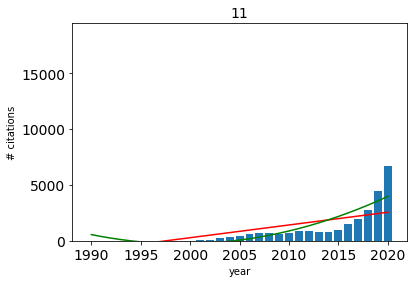

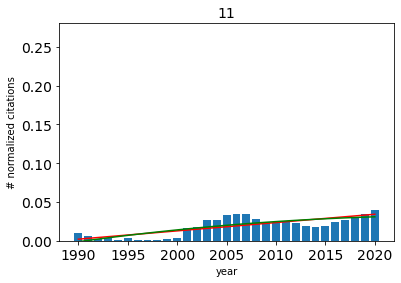

<Figure size 1152x648 with 0 Axes>

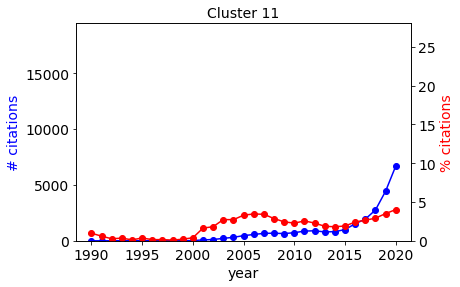

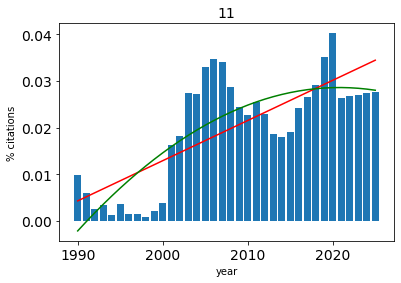

Semantic scholar keywords:
 ['Question answering', 'Software quality assurance', 'Experiment', 'Baseline (configuration management)', 'Benchmark (computing)', 'Artificial neural network', 'Knowledge base', 'Natural language', 'Information retrieval', 'Text corpus', 'Natural language processing', 'Algorithm', 'Parsing', 'Wikipedia']
CSO topics:
 ['computational linguistics', 'natural language processing', 'information retrieval', 'education', 'linguistics', 'formal languages', 'machine learning', 'ontology', 'knowledge based systems', 'semantics', 'artificial intelligence', 'information retrieval systems', 'network protocols', 'computer science', 'text mining']


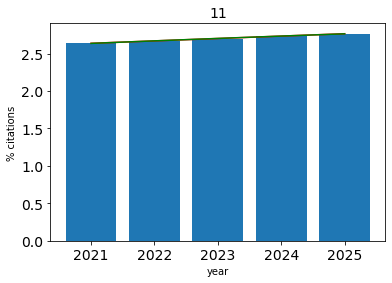

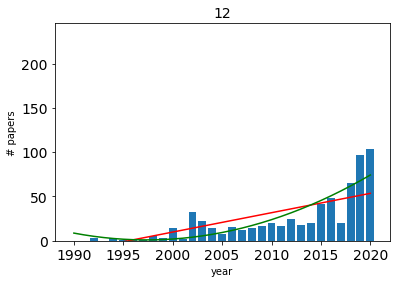

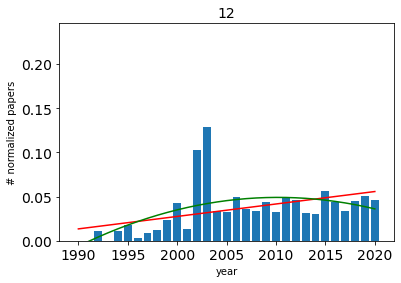

<Figure size 1152x648 with 0 Axes>

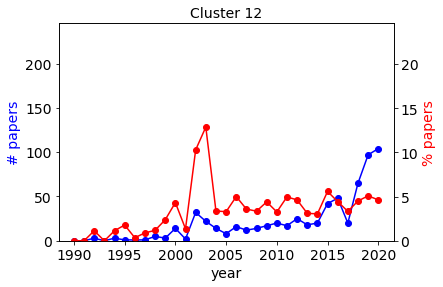

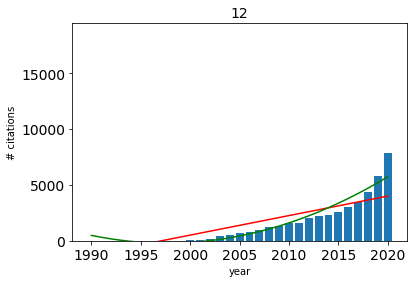

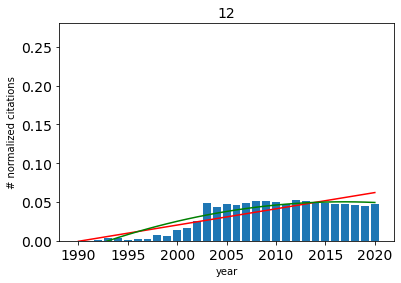

<Figure size 1152x648 with 0 Axes>

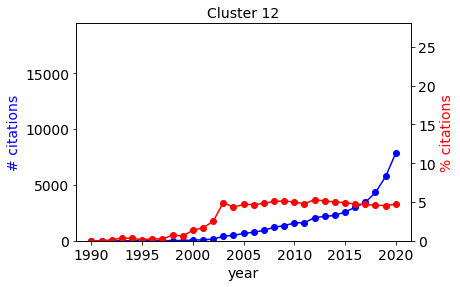

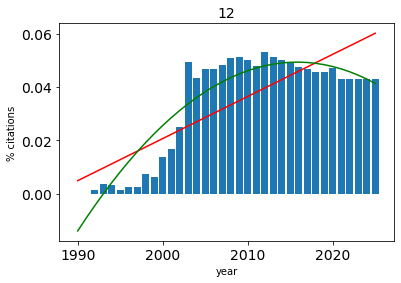

Semantic scholar keywords:
 ['Named entity', 'Experiment', 'Named-entity recognition', 'Entity', 'Algorithm', 'Text corpus', 'Baseline (configuration management)', 'Natural language processing', 'Entity linking', 'Knowledge base', 'Wikipedia', 'Benchmark (computing)', 'Word-sense disambiguation', 'Knowledge Graph']
CSO topics:
 ['computational linguistics', 'natural language processing', 'information retrieval', 'education', 'knowledge based systems', 'planar graph', 'artificial intelligence', 'machine learning', 'linguistics', 'data mining', 'semantics', 'information extraction', 'pattern recognition', 'graphic methods', 'graph theory']


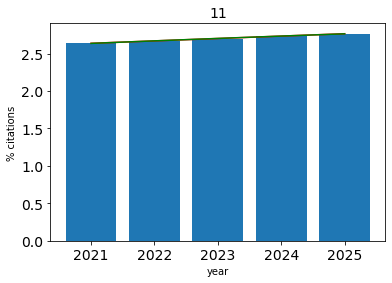

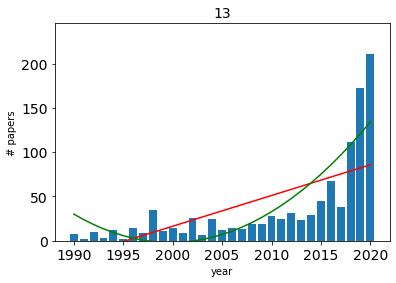

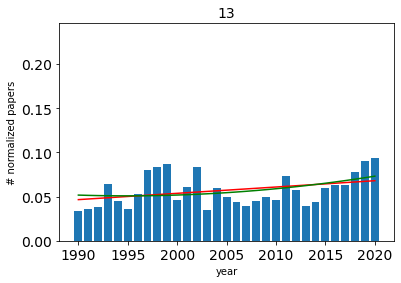

<Figure size 1152x648 with 0 Axes>

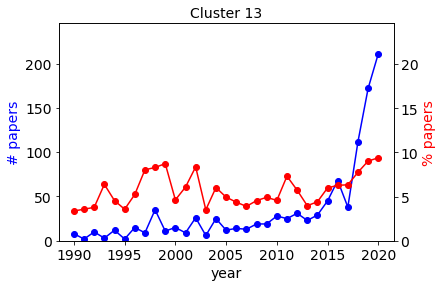

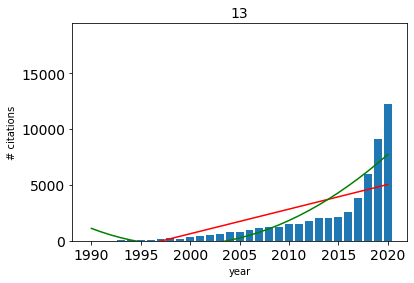

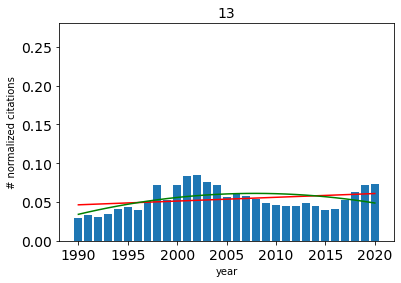

<Figure size 1152x648 with 0 Axes>

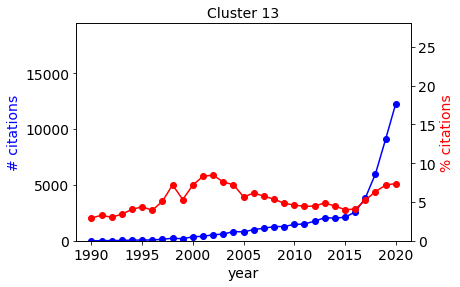

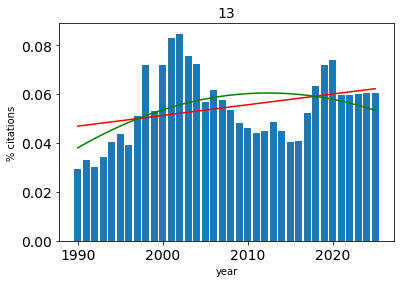

Semantic scholar keywords:
 ['Experiment', 'Document classification', 'Text corpus', 'Algorithm', 'Baseline (configuration management)', 'Natural language processing', 'Artificial neural network', 'Natural language generation', 'Machine learning', 'List comprehension', 'Benchmark (computing)', 'Unsupervised learning', 'Supervised learning', 'Parsing']
CSO topics:
 ['information retrieval systems', 'text mining', 'natural language processing', 'education', 'computational linguistics', 'text processing', 'machine learning', 'linguistics', 'artificial intelligence', 'semantics', 'word processing', 'data mining', 'speech recognition', 'mathematics', 'computer systems']


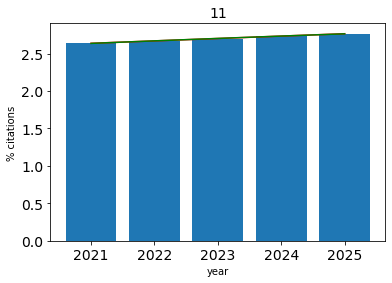

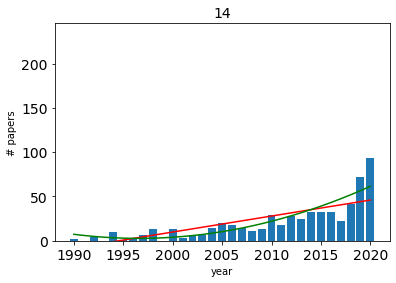

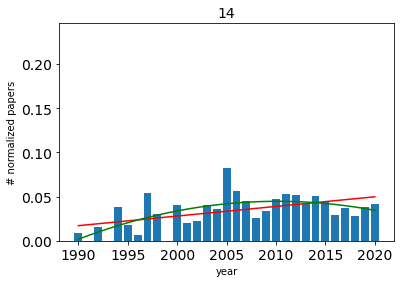

<Figure size 1152x648 with 0 Axes>

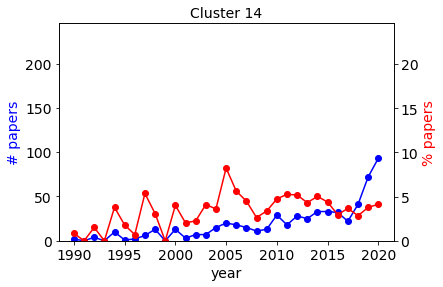

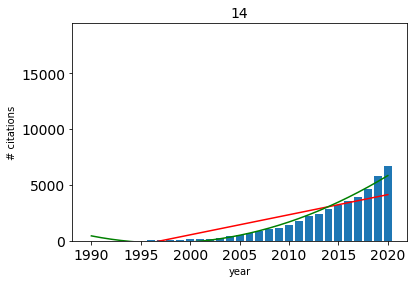

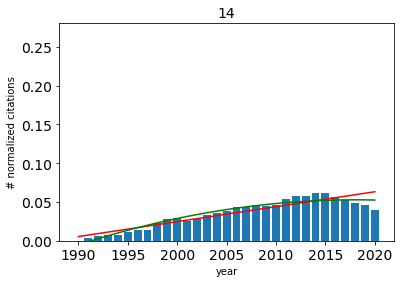

<Figure size 1152x648 with 0 Axes>

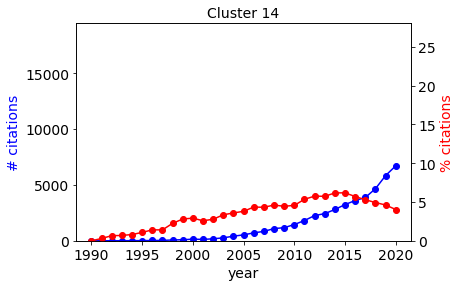

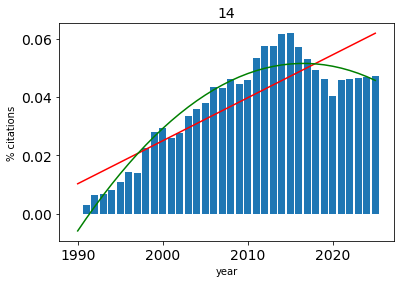

Semantic scholar keywords:
 ['Relationship extraction', 'Information extraction', 'Experiment', 'Algorithm', 'Baseline (configuration management)', 'Text corpus', 'Entity', 'Natural language processing', 'Machine learning', 'Parsing', 'Knowledge base', 'Supervised learning', 'ACE', 'Information retrieval']
CSO topics:
 ['natural language processing', 'data mining', 'information retrieval', 'information analysis', 'computational linguistics', 'education', 'information extraction', 'machine learning', 'information retrieval systems', 'text mining', 'artificial intelligence', 'knowledge based systems', 'linguistics', 'semantics', 'word processing']


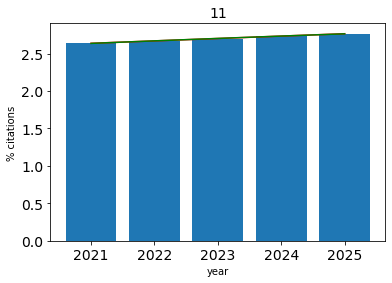

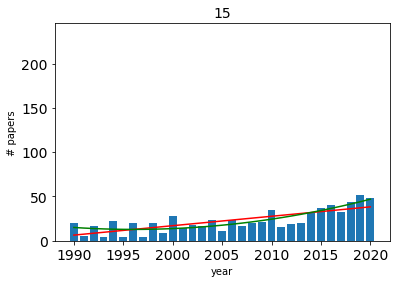

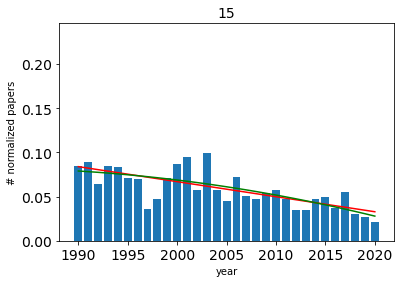

<Figure size 1152x648 with 0 Axes>

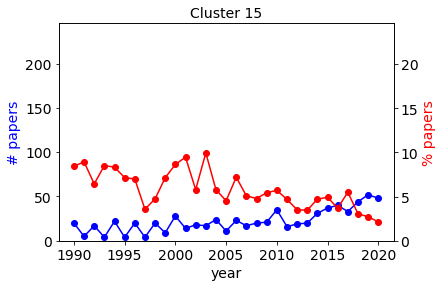

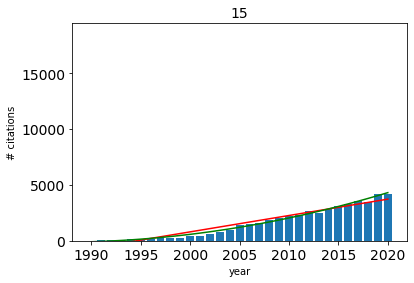

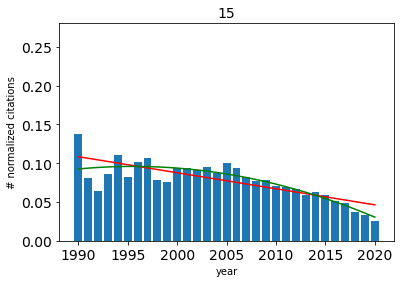

<Figure size 1152x648 with 0 Axes>

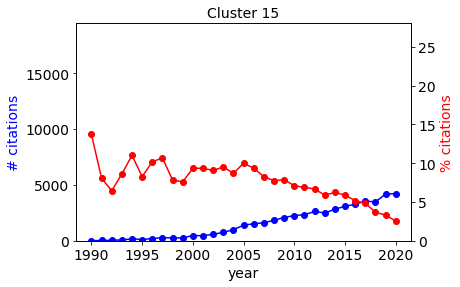

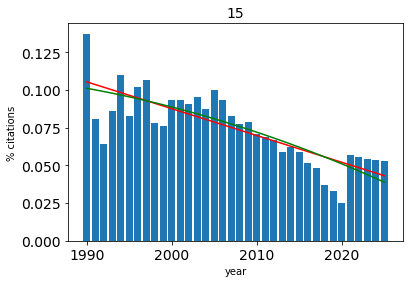

Semantic scholar keywords:
 ['Parsing', 'Algorithm', 'Experiment', 'Treebank', 'Natural language', 'Baseline (configuration management)', 'Natural language processing', 'Text corpus', 'Parser', 'Parse tree', 'Time complexity', 'Computation', 'The Wall Street Journal', 'Artificial neural network', 'Context-free language']
CSO topics:
 ['computational linguistics', 'formal languages', 'natural language processing', 'syntactics', 'linguistics', 'education', 'translation (languages)', 'mathematics', 'context free languages', 'artificial intelligence', 'machine learning', 'semantics', 'signal processing', 'inference engines', 'graph theory']


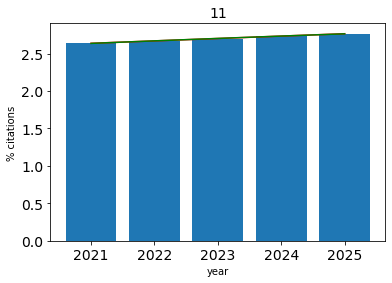

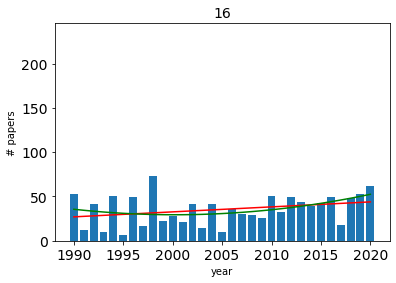

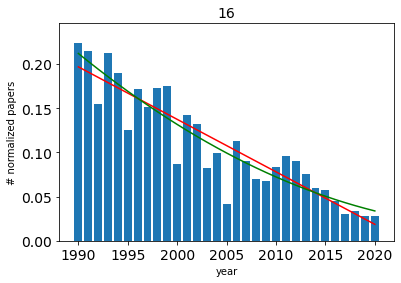

<Figure size 1152x648 with 0 Axes>

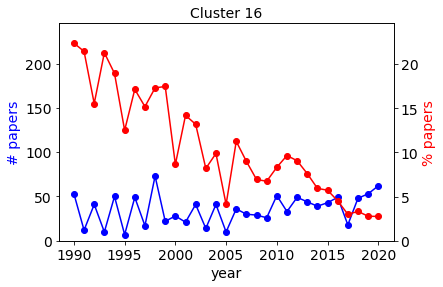

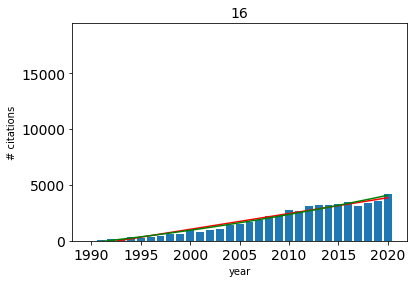

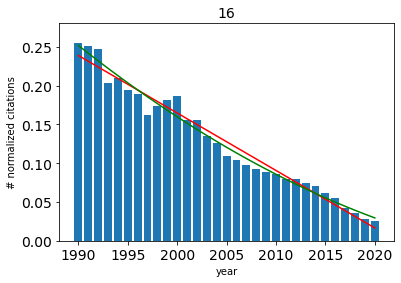

<Figure size 1152x648 with 0 Axes>

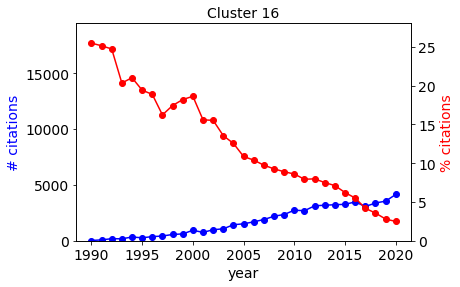

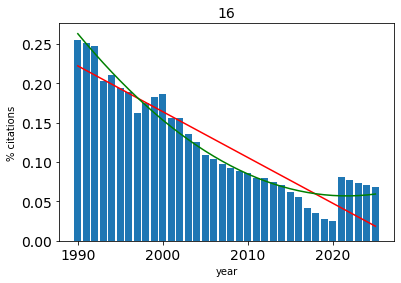

Semantic scholar keywords:
 ['Text corpus', 'Parsing', 'Lexicon', 'Algorithm', 'Experiment', 'Natural language processing', 'Machine translation', 'Baseline (configuration management)', 'Word-sense disambiguation', 'Semantics (computer science)', 'Parallel text', 'Computation', 'Dictionary', 'Natural language']
CSO topics:
 ['natural language processing', 'computational linguistics', 'formal languages', 'syntactics', 'linguistics', 'translation (languages)', 'education', 'machine translations', 'mathematics', 'statistical machine translation', 'artificial intelligence', 'information theory', 'semantics', 'context free languages', 'multilingualism']


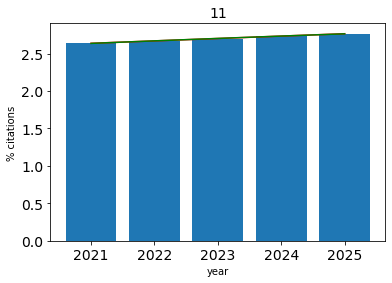

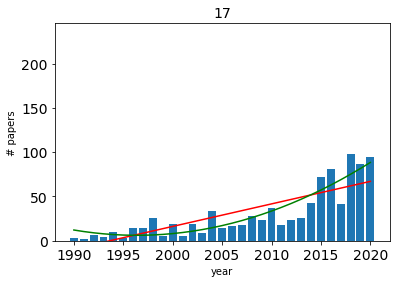

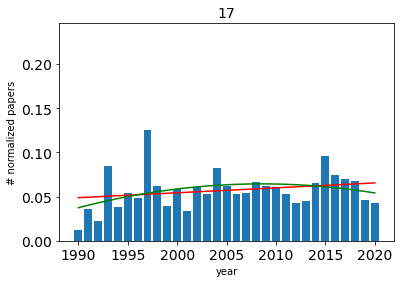

<Figure size 1152x648 with 0 Axes>

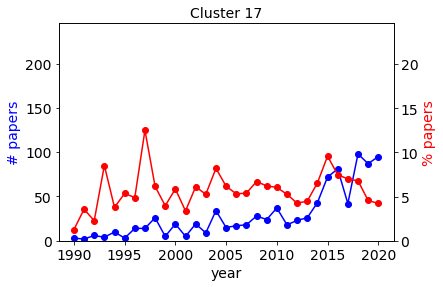

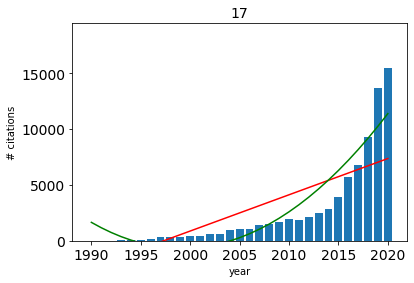

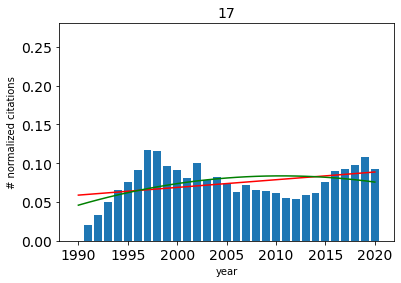

<Figure size 1152x648 with 0 Axes>

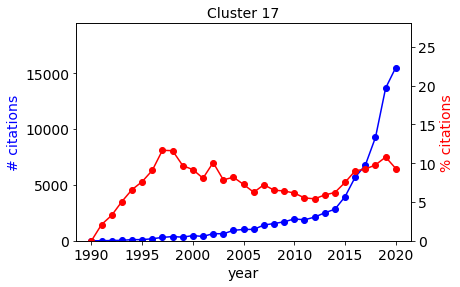

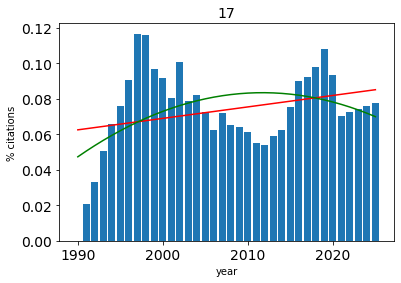

Semantic scholar keywords:
 ['Experiment', 'Word embedding', 'Text corpus', 'Natural language processing', 'Algorithm', 'Word sense', 'Word-sense disambiguation', 'Baseline (configuration management)', 'Unsupervised learning', 'Lexicon', 'Microsoft Word for Mac', 'Web Services for Devices', 'Bitext word alignment', 'Data structure alignment', 'WordNet']
CSO topics:
 ['natural language processing', 'computational linguistics', 'planar graph', 'education', 'word segmentation', 'artificial intelligence', 'linguistics', 'mathematics', 'multilingualism', 'statistical machine translation', 'machine translations', 'data mining', 'translation (languages)', 'machine learning', 'information theory']


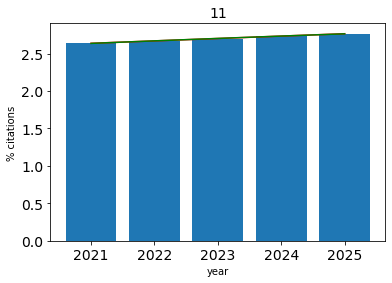

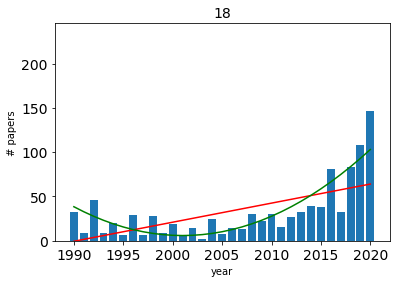

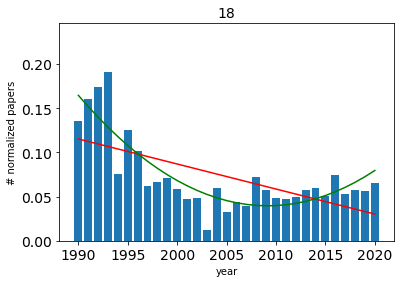

<Figure size 1152x648 with 0 Axes>

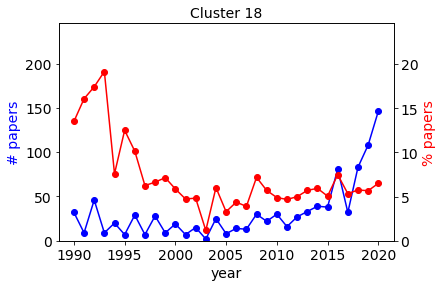

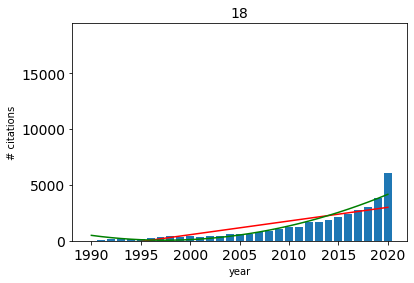

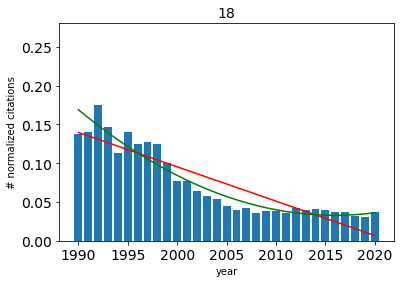

<Figure size 1152x648 with 0 Axes>

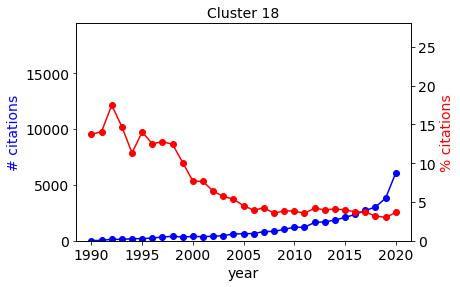

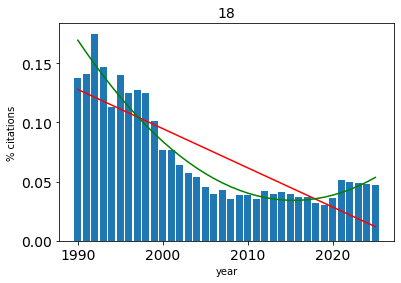

Semantic scholar keywords:
 ['Text corpus', 'Natural language processing', 'Experiment', 'Algorithm', 'Baseline (configuration management)', 'Word-sense disambiguation', 'Parsing', 'Computation', 'Machine learning', 'Natural language', 'Lexicon', 'Anaphora (linguistics)', 'Entity', 'Interaction']
CSO topics:
 ['natural language processing', 'computational linguistics', 'linguistics', 'artificial intelligence', 'education', 'semantics', 'mathematics', 'formal languages', 'speech recognition', 'inference engines', 'syntactics', 'word segmentation', 'information retrieval', 'machine learning', 'ontology']


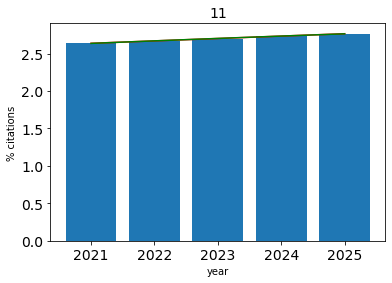

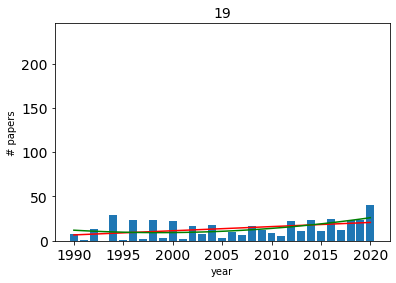

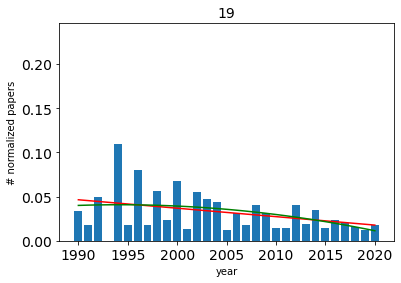

<Figure size 1152x648 with 0 Axes>

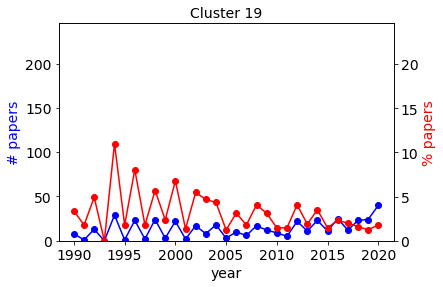

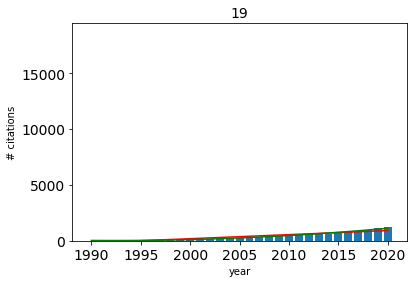

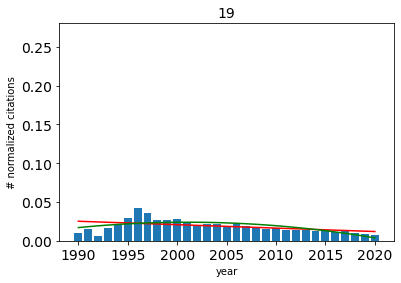

<Figure size 1152x648 with 0 Axes>

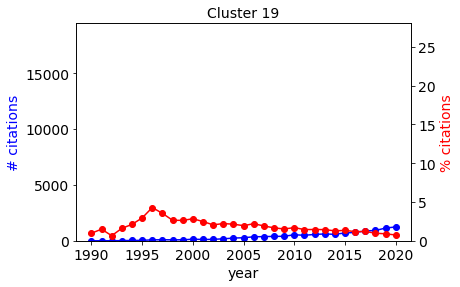

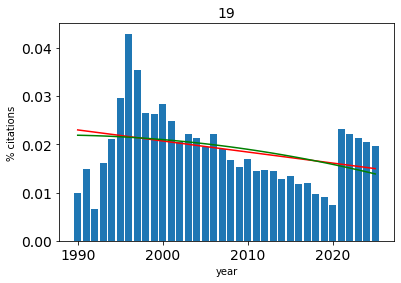

Semantic scholar keywords:
 ['Experiment', 'Text segmentation', 'Text corpus', 'Natural language processing', 'Parsing', 'Baseline (configuration management)', 'Algorithm', 'Dictionary', 'Part-of-speech tagging', 'Machine translation', 'Treebank', 'Language model', 'Lexicon', 'Artificial neural network']
CSO topics:
 ['natural language processing', 'computational linguistics', 'character recognition', 'linguistics', 'mathematics', 'education', 'artificial intelligence', 'formal languages', 'syntactics', 'machine learning', 'translation (languages)', 'information theory', 'speech recognition', 'semantics', 'data mining']


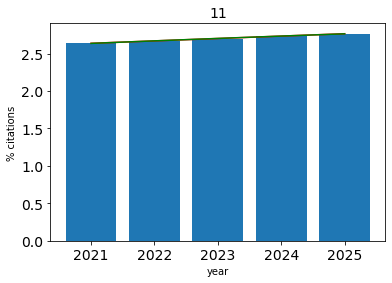

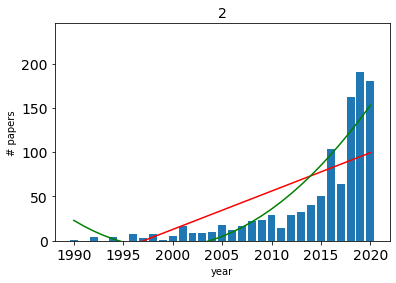

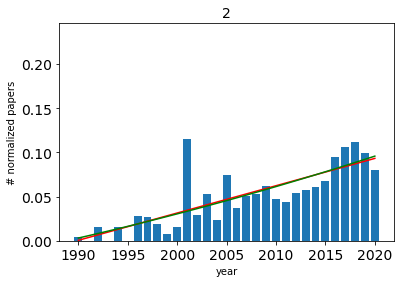

<Figure size 1152x648 with 0 Axes>

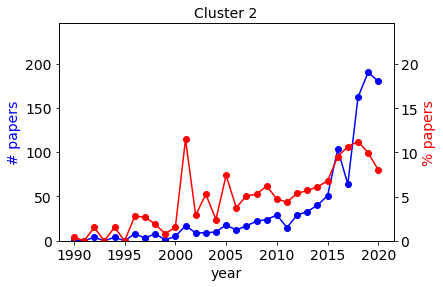

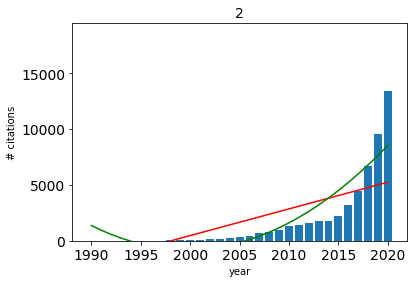

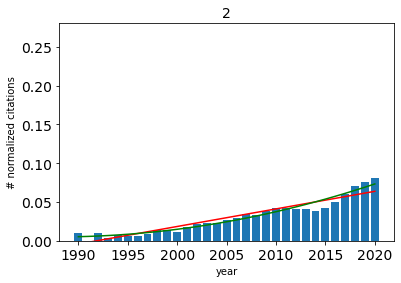

<Figure size 1152x648 with 0 Axes>

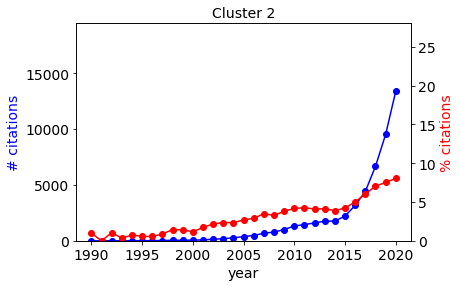

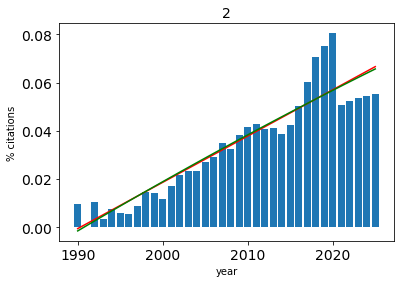

Semantic scholar keywords:
 ['Experiment', 'Natural language processing', 'Artificial neural network', 'Algorithm', 'Baseline (configuration management)', 'Supervised learning', 'Text corpus', 'Machine learning', 'Unsupervised learning', 'Parsing', 'Benchmark (computing)', 'Semiconductor industry', 'Part-of-speech tagging', 'Recurrent neural network']
CSO topics:
 ['education', 'natural language processing', 'computational linguistics', 'machine learning', 'artificial intelligence', 'linguistics', 'semantics', 'information retrieval', 'formal languages', 'speech recognition', 'data mining', 'mathematics', 'inference engines', 'network protocols', 'planar graph']


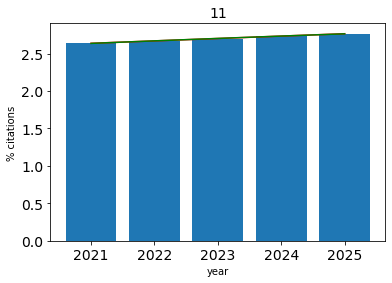

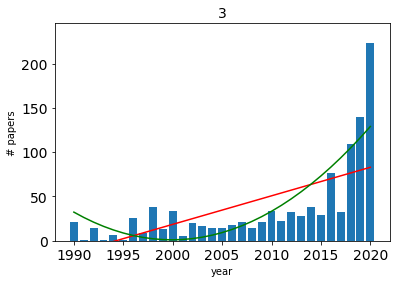

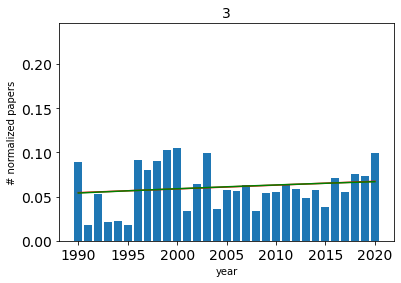

<Figure size 1152x648 with 0 Axes>

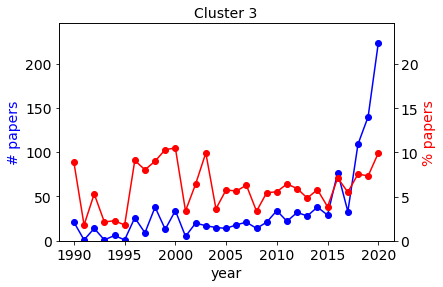

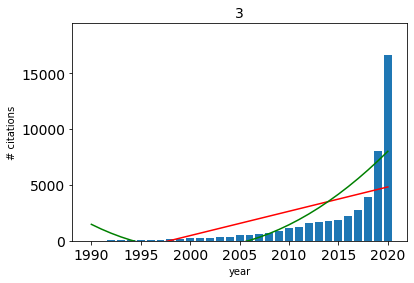

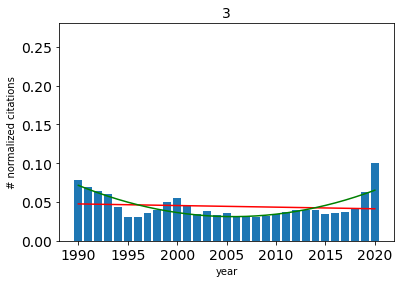

<Figure size 1152x648 with 0 Axes>

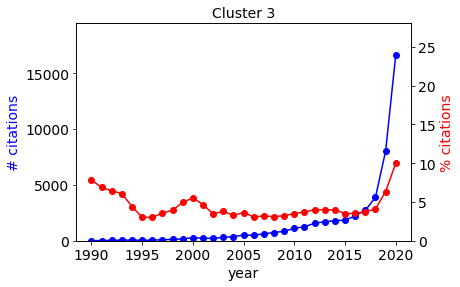

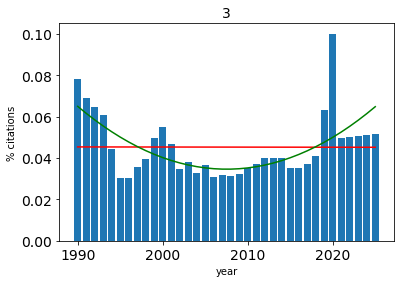

Semantic scholar keywords:
 ['Language model', 'Experiment', 'Natural language processing', 'Text corpus', 'Algorithm', 'Natural language', 'Baseline (configuration management)', 'Parsing', 'Artificial neural network', 'N-gram', 'Perplexity', 'Machine learning', 'Machine translation', 'Computation']
CSO topics:
 ['computational linguistics', 'natural language processing', 'speech recognition', 'linguistics', 'education', 'semantics', 'artificial intelligence', 'mathematics', 'statistical methods', 'machine learning', 'translation (languages)', 'knowledge representation', 'information theory', 'inference engines', 'information retrieval']


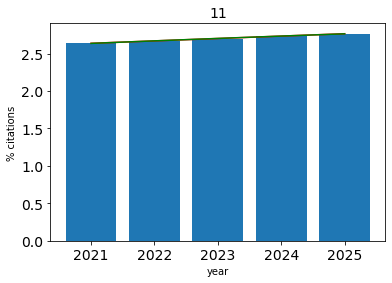

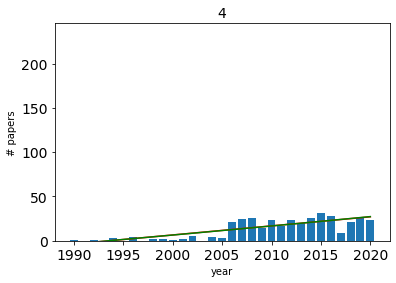

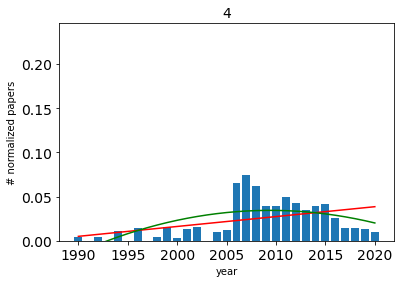

<Figure size 1152x648 with 0 Axes>

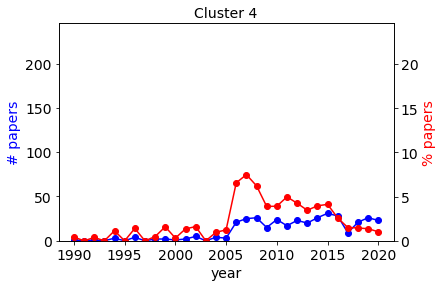

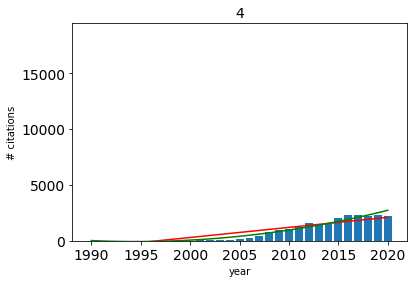

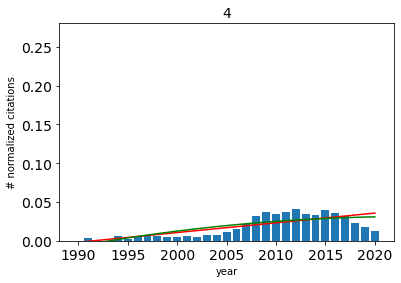

<Figure size 1152x648 with 0 Axes>

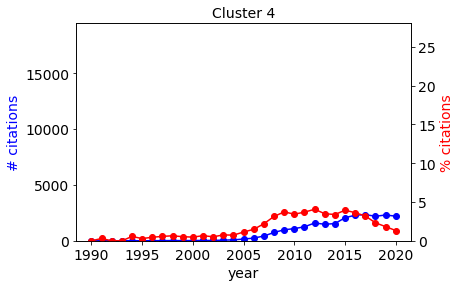

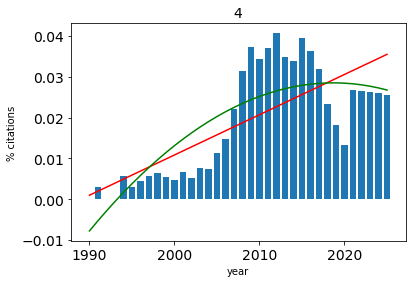

Semantic scholar keywords:
 ['Parsing', 'Treebank', 'Experiment', 'Algorithm', 'Baseline (configuration management)', 'Attachments', 'Text corpus', 'Natural language processing', 'Dependency grammar', 'Parser', 'Parse tree', 'Artificial neural network', 'Time complexity', 'Natural language', 'Unsupervised learning']
CSO topics:
 ['computational linguistics', 'natural language processing', 'formal languages', 'syntactics', 'education', 'translation (languages)', 'machine learning', 'graphic methods', 'mathematics', 'linguistics', 'artificial intelligence', 'inference engines', 'graph theory', 'bayesian networks', 'pattern recognition']


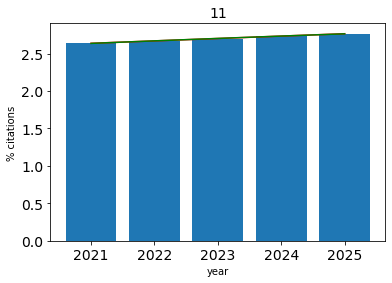

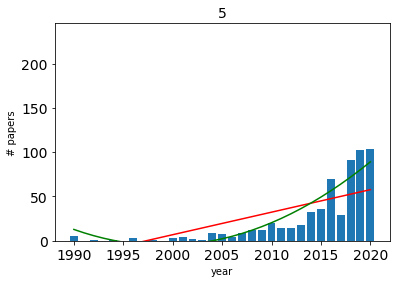

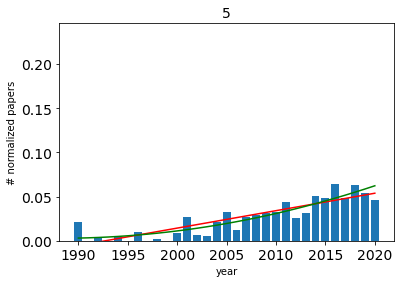

<Figure size 1152x648 with 0 Axes>

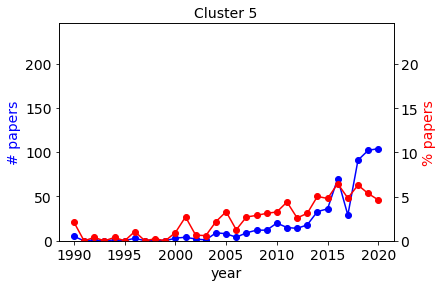

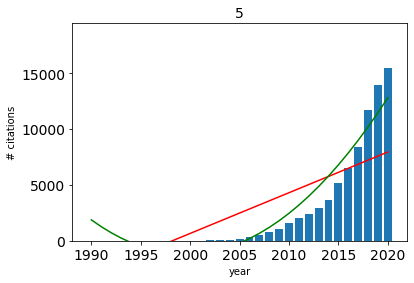

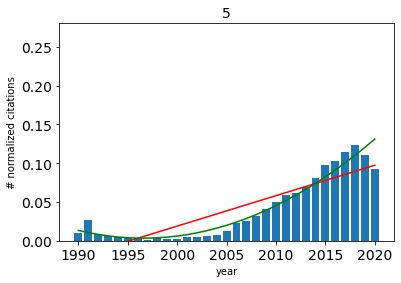

<Figure size 1152x648 with 0 Axes>

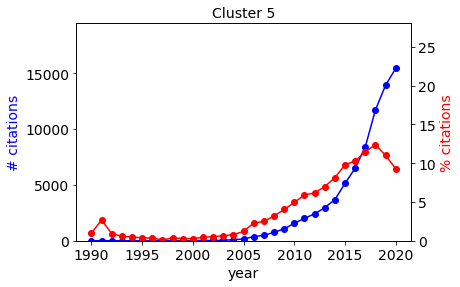

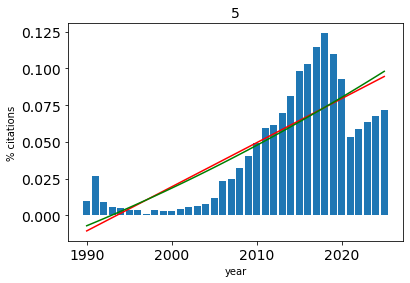

Semantic scholar keywords:
 ['Sentiment analysis', 'Experiment', 'Baseline (configuration management)', 'Artificial neural network', 'Text corpus', 'Algorithm', 'Natural language processing', 'Lexicon', 'Benchmark (computing)', 'Statistical classification', 'Long short-term memory', 'Parsing', 'Supervised learning', 'Machine learning']
CSO topics:
 ['natural language processing', 'computational linguistics', 'data mining', 'education', 'text processing', 'machine learning', 'opinion mining', 'syntactics', 'artificial intelligence', 'planar graph', 'linguistics', 'computer systems', 'classification methods', 'speech recognition', 'semantics']


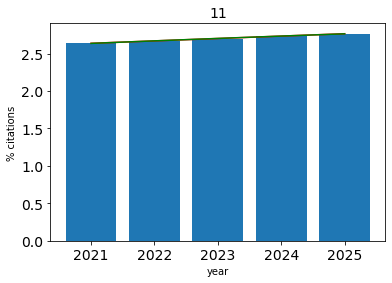

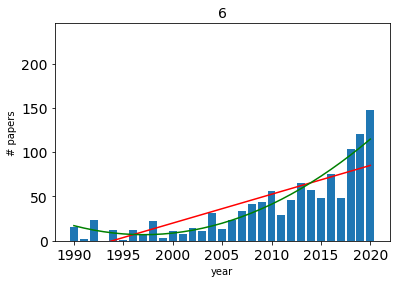

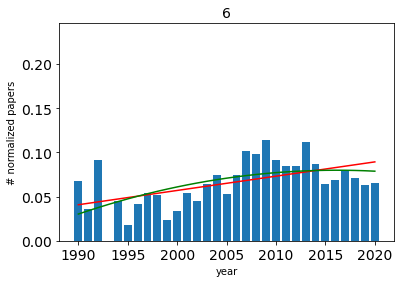

<Figure size 1152x648 with 0 Axes>

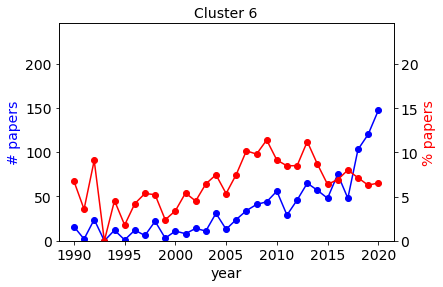

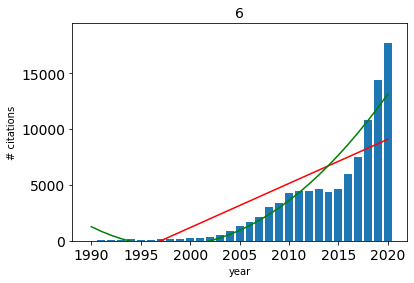

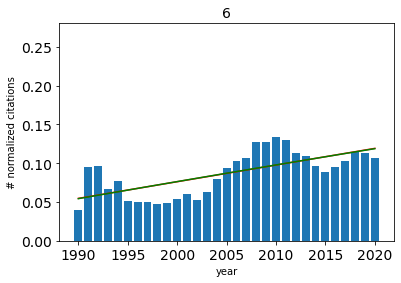

<Figure size 1152x648 with 0 Axes>

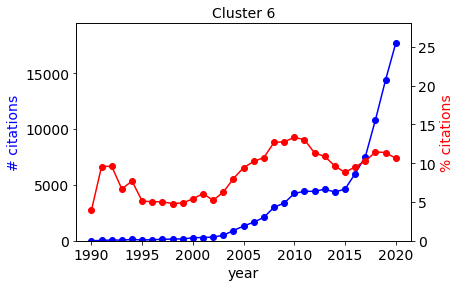

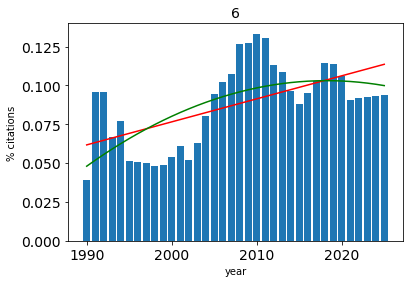

Semantic scholar keywords:
 ['BLEU', 'Statistical machine translation', 'Experiment', 'Machine translation', 'Neural machine translation', 'Baseline (configuration management)', 'Text corpus', 'Algorithm', 'Language model', 'Compiler', 'Parsing', 'Parallel text', 'Encoder', 'Artificial neural network']
CSO topics:
 ['natural language processing', 'translation (languages)', 'information theory', 'computer aided language translation', 'speech transmission', 'statistical methods', 'statistical machine translation', 'computational linguistics', 'mathematics', 'education', 'multilingualism', 'speech recognition', 'machine learning', 'linguistics', 'syntactics']


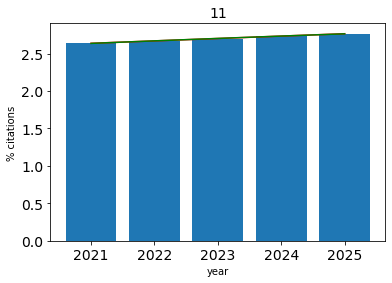

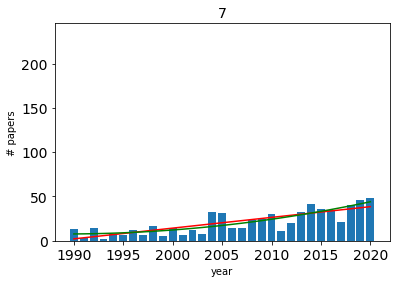

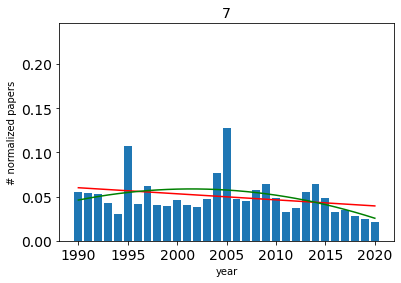

<Figure size 1152x648 with 0 Axes>

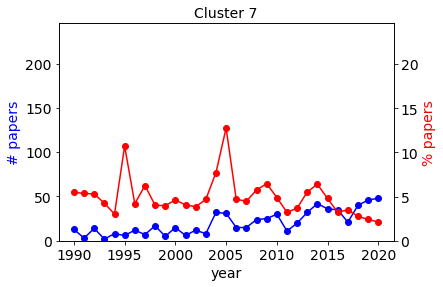

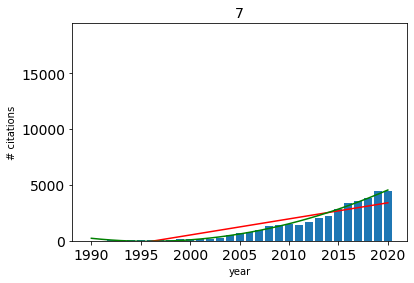

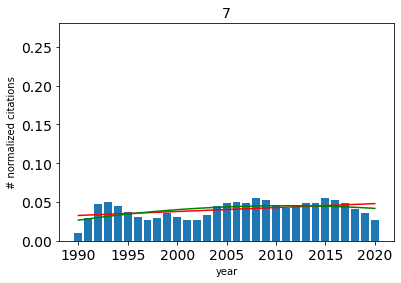

<Figure size 1152x648 with 0 Axes>

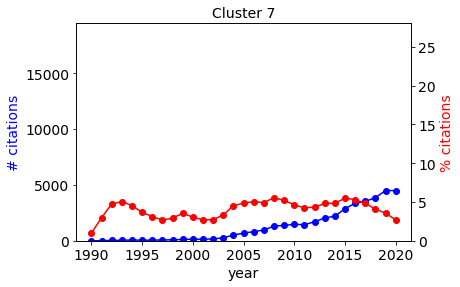

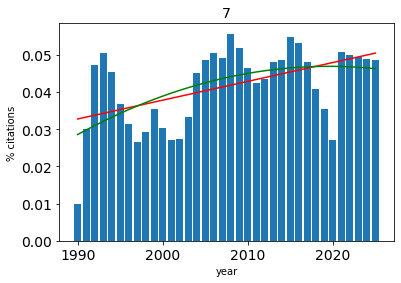

Semantic scholar keywords:
 ['Semantic role labeling', 'Experiment', 'Parsing', 'Natural language processing', 'Text corpus', 'Algorithm', 'Baseline (configuration management)', 'Lexicon', 'Semantic similarity', 'WordNet', 'Artificial neural network', 'Word-sense disambiguation', 'Machine learning', 'Distributional semantics']
CSO topics:
 ['computational linguistics', 'natural language processing', 'education', 'formal languages', 'artificial intelligence', 'linguistics', 'machine learning', 'information retrieval', 'ontology', 'mathematics', 'planar graph', 'inference engines', 'data mining', 'translation (languages)', 'speech recognition']


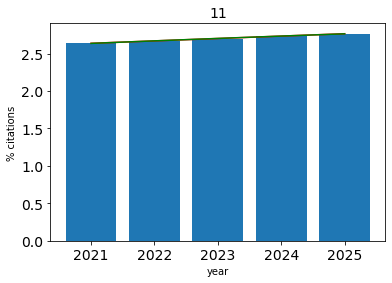

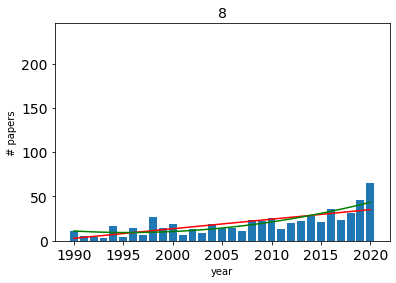

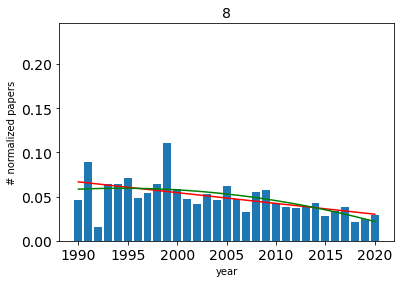

<Figure size 1152x648 with 0 Axes>

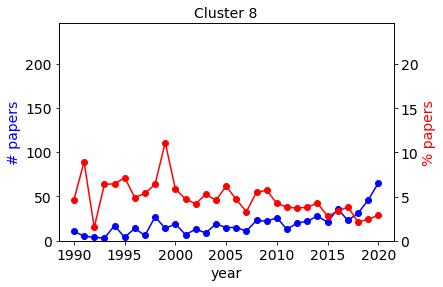

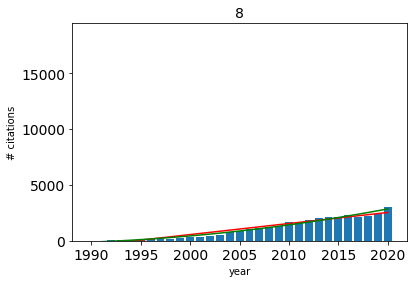

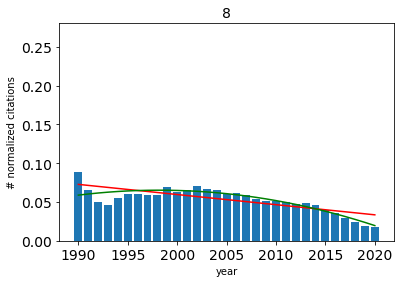

<Figure size 1152x648 with 0 Axes>

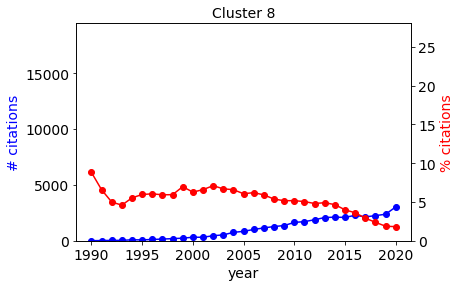

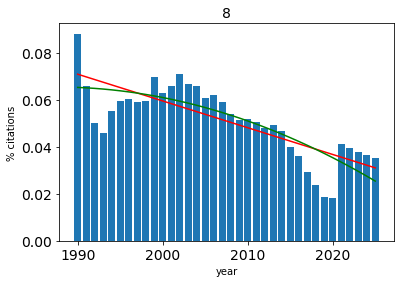

Semantic scholar keywords:
 ['Experiment', 'Text corpus', 'Speech recognition', 'Baseline (configuration management)', 'Algorithm', 'Parsing', 'Part-of-speech tagging', 'Natural language processing', 'Language model', 'Acoustic cryptanalysis', 'Machine learning', 'Speech synthesis', 'Lexicon', 'Hidden Markov model']
CSO topics:
 ['natural language processing', 'speech communication', 'computational linguistics', 'signal processing', 'linguistics', 'education', 'speech processing', 'machine learning', 'artificial intelligence', 'speech recognition', 'mathematics', 'formal languages', 'pattern recognition', 'semantics', 'data mining']


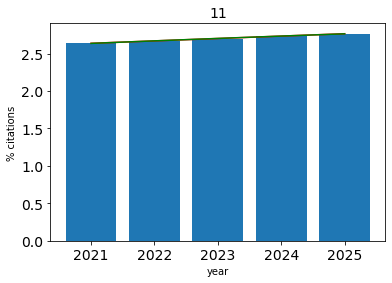

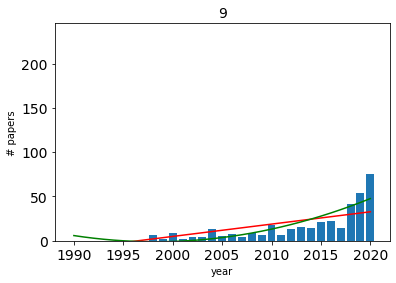

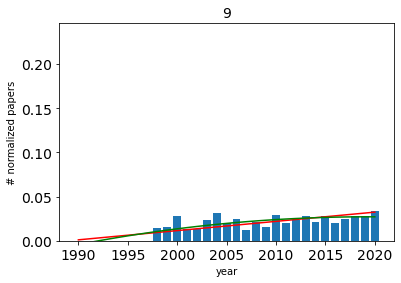

<Figure size 1152x648 with 0 Axes>

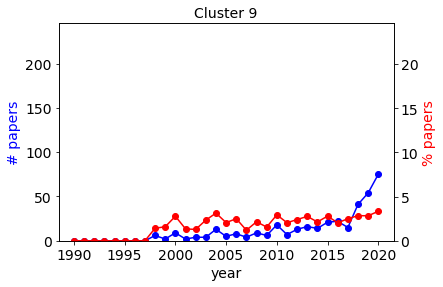

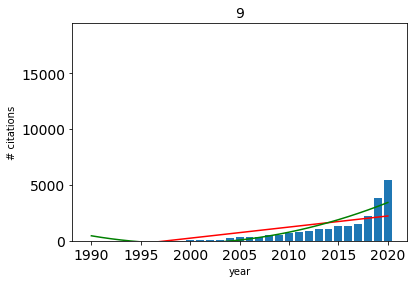

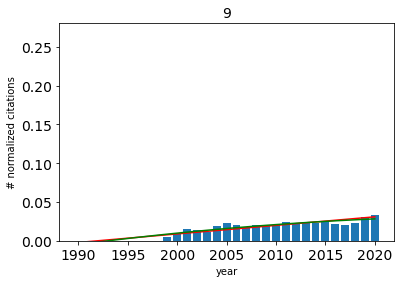

<Figure size 1152x648 with 0 Axes>

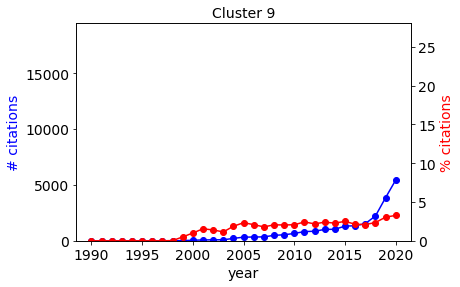

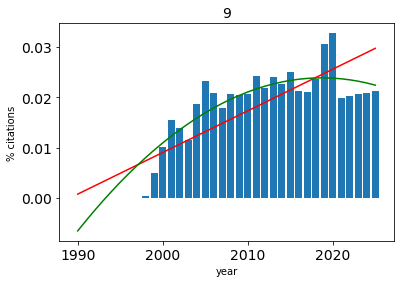

Semantic scholar keywords:
 ['Automatic summarization', 'Experiment', 'Multi-document summarization', 'Algorithm', 'Baseline (configuration management)', 'Text corpus', 'Benchmark (computing)', 'Relevance', 'Upsampling', 'Encoder', 'Unsupervised learning', 'Cluster analysis', 'Mathematical optimization', 'Language model']
CSO topics:
 ['text processing', 'word processing', 'natural language processing', 'information retrieval systems', 'text mining', 'education', 'computational linguistics', 'machine learning', 'mathematics', 'machine translations', 'syntactics', 'correlation analysis', 'data mining', 'linguistics', 'hierarchical system']


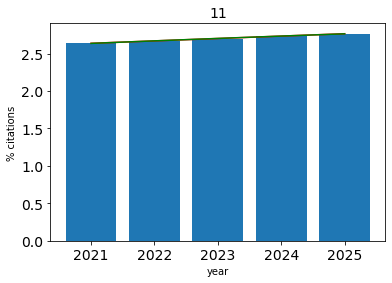

In [56]:
for c in sorted(list(cluster2year2papers.keys())):
    present(str(c), accumulated=False)
    plot_predictd_citations(str(c))

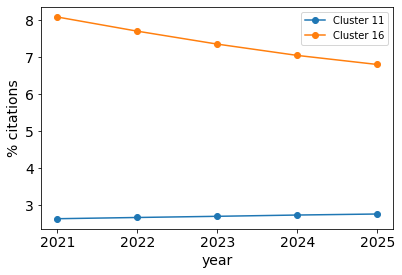

In [63]:
# Plot the % citations for the predicted years, e.g. here clusters 11, 16
util.plot_year2value_multiple_clusters(cluster2_2021_2025_2norm_citations, 
                                       cluster_indices=['11', '16'], #[str(i) for i in range(20)],
                                       y_label="% citations", y_lim_top=None, accumulated=False)